In [1]:
import matplotlib.pyplot as plt
import random
import time

def makeData(n):
    a            = []
    chain_length = 0
    max_length   = 1
    max_length_i = 0
    for i in range(0,n):
        # While the chain length is more than one, make it increasing
        if (chain_length > 0):
            # a.append(random.random()/n + a[-1])
            a.append(random.random() + a[-1])
            chain_length -= 1
            
        # Otherwise, just add a random number (randomize the chance of starting a chain)
        else:
            if (random.random() < 0.01):
                # Chain length...
                # chain_length = int(random.random()*n)   # chain is a fraction of the overall length
                chain_length = int(random.random()*5000)  # chain is based on a fixed constant
                
                # Make sure it doesn't exceed the length of the array
                if (i+chain_length) > n:
                    chain_length = n - i
                # Track the max chain length
                if (chain_length > max_length):
                    max_length = chain_length
                    max_length_i = i
            # Append a random number
            a.append(random.random())
            
    return a,max_length,max_length_i

a,max_length,max_length_i = makeData(1000)
print('max_length =',max_length,' || ','max_length_i =',max_length_i)

max_length = 956  ||  max_length_i = 44


In [2]:
#
# Naive approach... should be O(n)
#
def maxMonoIncreasingNaive(a):
    
    ts0 = int(time.time() * 1000)
    
    n      = len(a)
    chain_i = 0
    chain_l = 0
    in_chain = False
    
    max_chain_found_len = 0
    max_chain_found_i   = 0
    
    for i in range(1,n):
        if in_chain:
            if (a[i] >= a[i-1]):
                chain_l += 1
            else:
                in_chain = False
                if chain_l > max_chain_found_len:
                    max_chain_found_len = chain_l
                    max_chain_found_i   = chain_i
        else:
            if (a[i] >= a[i-1]):
                chain_i = i-1
                chain_l = 1
                in_chain = True
    
    # Leftover calculation
    if in_chain:
        if chain_l > max_chain_found_len:
            max_chain_found_len = chain_l
            max_chain_found_i   = chain_i
    
    ts1 = int(time.time()*1000)
    
    return max_chain_found_len,max_chain_found_i,ts1-ts0
    
maxMonoIncreasingNaive(a)


(956, 43, 0)

In [3]:
#
# From a specific index, determine the longest sequence in both directions
#
def scan(a,i):
    i1 = i
    while i1 < len(a) and a[i1] >= a[i1-1]:
        i1 += 1
    i0 = i
    while i0 > 0 and a[i0] >= a[i0-1]:
        i0 -= 1
    return i0,i1

#
# Version jumps ahead by the largest chain found so far...
#
def maxMonoIncreasingJump(a):
    ts0 = int(time.time() * 1000)

    n = len(a)
    i = 1
    
    max_chain_found_len = 1
    max_chain_found_i   = 0

    while (i < n):
        if a[i] >= a[i-1]:
            i0,i1 = scan(a,i)
            if (i1-i0) > max_chain_found_len:
                max_chain_found_len = i1 - i0 - 1
                max_chain_found_i   = i0

        i += max_chain_found_len
    
    ts1 = int(time.time() * 1000)
    
    return max_chain_found_len,max_chain_found_i,ts1-ts0

maxMonoIncreasingJump(a)

(956, 43, 0)

In [4]:
#
# Scan tries to be more informed by only caring about sequences
# larger than the largest found so far...
#
def scanBetter(a,i,largest):
    i1  = i
    inc = 1
    last = i
    
    while i1 < len(a) and a[i1] >= a[last]:
        inc *= 2
        last = i1
        i1 += inc
        
    i0 = i
    inc = 1
    last = i
    
    while i0 > 0 and a[last] >= a[i0]:
        inc *= 2
        last = i0
        i0 -= inc
    
    # Bail out if the rough check fails...
    if (i1 - i0) < largest:
        return i0,i1
    
    # Otherwise, perform the exhausive version
    return scan(a,i)

#
# Same as the Jump version... but uses Scan Better instead
#
def maxMonoIncreasingJumpV2(a):
    ts0 = int(time.time() * 1000)

    n = len(a)
    i = 1
    
    max_chain_found_len = 1
    max_chain_found_i   = 0

    while (i < n):
        if a[i] >= a[i-1]:
            i0,i1 = scanBetter(a,i,max_chain_found_len)
            if (i1-i0) > max_chain_found_len:
                max_chain_found_len = i1 - i0 - 1
                max_chain_found_i   = i0

        i += max_chain_found_len
    
    ts1 = int(time.time() * 1000)
    
    return max_chain_found_len,max_chain_found_i,ts1-ts0

maxMonoIncreasingJumpV2(a)


(956, 43, 0)

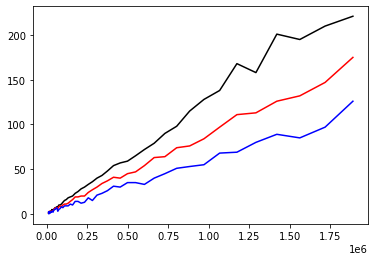

In [5]:
points     = 10000
max_points = 2000000
inc        = 1.1

x_coord         = []
y_coord_naive   = []
y_coord_jump    = []
y_coord_jump_v2 = []

while points < max_points:
    a,max_length,max_length_i = makeData(int(points))
    
    naive_len, naive_i, naive_t = maxMonoIncreasingNaive(a)
    jump_len,  jump_i,  jump_t  = maxMonoIncreasingJump(a)
    jump2_len, jump2_i, jump2_t = maxMonoIncreasingJumpV2(a)
    
    if naive_len != jump_len:
        print('naive len = ',naive_len,' || ','jump_len = ',jump_len)
    if naive_len != jump2_len:
        print('naive len = ',naive_len,' || ','jump2_len = ',jump2_len)
    
    x_coord.        append(points)
    y_coord_naive.  append(naive_t)
    y_coord_jump.   append(jump_t)
    y_coord_jump_v2.append(jump2_t)
    
    points *= inc

plt.plot(x_coord, y_coord_naive,   c = 'black')
plt.plot(x_coord, y_coord_jump,    c = 'red')
plt.plot(x_coord, y_coord_jump_v2, c = 'blue')
plt.show()